# Mall Customer Segmentation
This notebook is to practice clustering using real-world data and solving real-world problem. 

This notebook will utilize clustering approach to identify high value customer for mall. 

In [1]:
import pandas as pd
pd.options.display.max_columns = None
pd.set_option('display.float_format', lambda x: '%.6f' % x)
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected = True)

In [4]:
# Install PyDrive for downloading the dataset from google drive
!pip install -U -q PyDrive

     |████████████████████████████████| 993kB 2.8MB/s 


In [0]:
# Mount Google Drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# Download file
file_id = '1GG-eBV4uDsXijh5mujXq4JqclcIqkohc' # URL id. 
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('Mall_Customers.csv')

In [0]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [9]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [10]:
df.columns = ['CustomerID','Gender','Age','Annual Income','Spending Score']

df.head(10)

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID        200 non-null int64
Gender            200 non-null object
Age               200 non-null int64
Annual Income     200 non-null int64
Spending Score    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


The dataset is clean, no null values, and simple. Let's go to Exploratory Data Analysis. 

## Exploratory Data Analysis

Female    112
Male       88
Name: Gender, dtype: int64


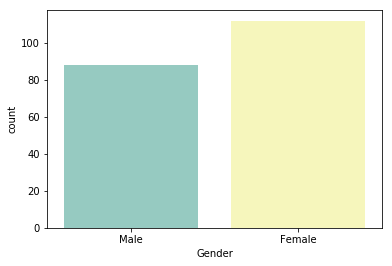

In [15]:
ax = sns.countplot(x='Gender', data=df, palette='Set3')

gender_count = df['Gender'].value_counts()
print(gender_count.sort_index(ascending = True))

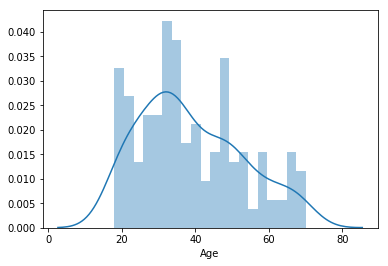

In [20]:
ax = sns.distplot(df['Age'], bins=20)

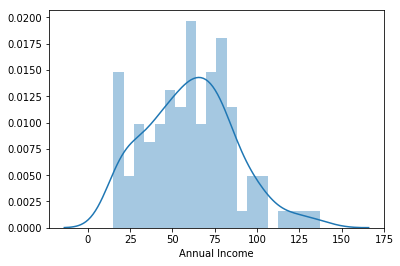

In [21]:
ax = sns.distplot(df['Annual Income'], bins=20)

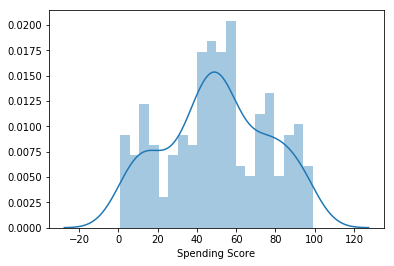

In [22]:
ax = sns.distplot(df['Spending Score'], bins=20)